Basic (Shallow) Neural Network Design, with Self Scaling Formulation:

Reid Zaffino (zaffino@uwindsor.ca) 2021-06 - 2021-07

Resources from Coursera "Neural Networks and Deep Learning" Course

Self Scaling Methodology from: 
    Djahanshahi, Hormoz., "A robust hybrid VLSI neural network architecture for a smart optical sensor." 
    (1999). Electronic Theses and Dissertations. 737. 
    https://scholar.uwindsor.ca/etd/737 

$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    
    s = 1/(1 + np.exp(-x))
    return s

In [3]:
def layer_sizes(X, Y, n_h):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0]
    n_h = n_h
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [4]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Forward Propagation:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$

$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$

$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$

$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$

In [5]:
def forward_propagation(X, parameters, n, ss):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    
    if (ss):
        A1 = np.tanh(Z1 / X.shape[0])
    else:
        A1 = np.tanh(Z1)
    
    #plt.scatter(Z1, A1)
    
    Z2 = np.dot(W2, A1) + b2
    
    if (ss):
        A2 = sigmoid(np.divide(Z2, n * X.shape[0]))
    else:
        A2 = sigmoid(Z2)
    
    plt.scatter(Z2, A2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Cost Function:
$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{6}$$

In [6]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = (-1/m)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

Backward Propagation:

$$dZ^{[2]} =  A^{[2]} - Y\tag{7}$$

$$dW^{[2]} = \frac{1}{m} dZ^{[2]}(A^{[1]})^{T}\tag{8}$$

$$db^{[2]} = \frac{1}{m} \sum{dZ^{[2]}}\tag{9}$$

$$dZ^{[1]} = W^{[2]T}dZ^{[2]}*g^{[1]'}(Z^{[1]})\tag{10}$$

$$dW^{[1]} = \frac{1}{m} dZ^{[1]}X^{T}\tag{11}$$

$$db^{[1]} = \frac{1}{m} \sum{dZ^{[1]}}\tag{12}$$

In [7]:
def backward_propagation(parameters, cache, X, Y, n, ss):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y 
    
    dW2 = (1/m)*(np.dot(dZ2, A1.T))
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims = True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [8]:
def update_parameters(parameters, grads, learning_rate = 1):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - dW1 * learning_rate
    b1 = b1 - db1 * learning_rate
    W2 = W2 - dW2 * learning_rate
    b2 = b2 - db2 * learning_rate
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [9]:
def nn_model(X, Y, n_h, ss, num_iterations = 10000):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y, n_h)[0]
    n_y = layer_sizes(X, Y, n_h)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters, n_h, ss)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y, n = n_h, ss = ss)
        parameters = update_parameters(parameters, grads)

    return parameters

Prediction:

$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

In [10]:
def predict(parameters, X, n_h, ss = False):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (0 / 1)
    """
    
    A2, cache = forward_propagation(X, parameters, n_h, ss)
    predictions = (A2 > 0.5).astype(int)
    
    return predictions

In [11]:
X = np.array([
    [1, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
]).T

Y = np.array([
    [0, 1],
    [0, 0],
    [0, 1],
    [0, 0],
    [1, 0],
    [1, 1],
]).T

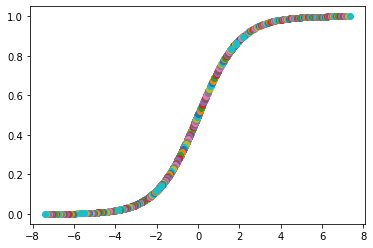

In [12]:
n1 = nn_model(X, Y, 3, False, num_iterations=200)

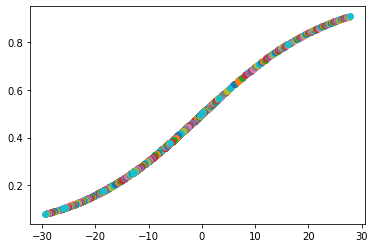

In [13]:
n2 = nn_model(X, Y, 3, True, num_iterations=200)

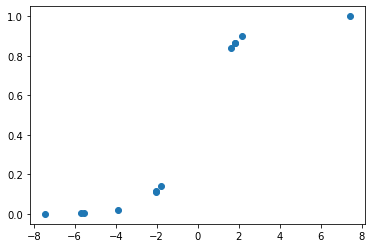

In [14]:
p1 = predict(n1, X, 3)

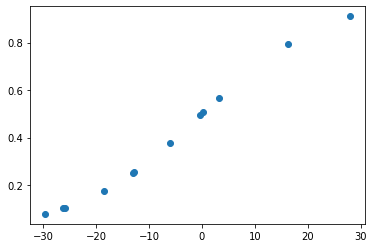

In [15]:
p2 = predict(n2, X, 3, ss = True)

In [16]:
Yre = Y.reshape(1, Y.shape[0] * Y.shape[1])
p1re = p1.reshape(1, p1.shape[0] * p1.shape[1])
p2re = p2.reshape(1, p2.shape[0] * p2.shape[1])

In [17]:
print ('Accuracy of nn1 on training data: %d' % float((np.dot(Yre, p1re.T) + np.dot(1 - Yre, 1 - p1re.T)) / float(Yre.size) * 100) + '%')
print ('Accuracy of nn2 on training data: %d' % float((np.dot(Yre, p2re.T) + np.dot(1 - Yre, 1 - p2re.T)) / float(Yre.size) * 100) + '%')

Accuracy of nn1 on training data: 100%
Accuracy of nn2 on training data: 75%


In [18]:
Xtrain = np.array([
[1,0,1,0,0,0,0,1],
[0,1,0,1,0,0,1,0],
[1,0,1,0,0,0,1,0],
[1,0,0,1,0,0,1,1],
[0,0,1,1,0,1,0,1],
[0,1,1,1,0,1,0,0],
[0,1,0,1,1,0,1,1],
[0,1,0,1,1,1,1,0],
[1,0,1,0,0,1,0,0],
[0,0,1,0,0,0,0,1],
[1,1,1,1,1,1,0,0],
[0,0,0,0,0,1,0,1],
[0,0,1,0,0,1,0,1],
[0,0,0,1,1,1,1,1],
[1,1,0,0,0,0,0,1],
[1,1,0,0,1,1,0,0],
[0,0,1,1,0,0,0,1],
[1,0,0,0,1,1,0,1],
[0,0,0,1,0,0,1,1],
[0,0,0,1,1,1,0,0],
[1,0,0,1,0,0,0,1],
[0,1,1,0,1,1,1,0],
[1,1,1,1,0,0,1,0],
[0,0,1,1,0,1,1,0],
[0,1,0,1,1,1,0,1],
[0,1,0,1,0,1,0,0],
[0,0,1,1,0,0,1,1],
[1,1,0,1,1,0,1,1],
[0,1,0,1,0,1,1,0],
[0,1,1,0,0,0,0,1],
[0,0,1,1,1,1,0,0],
[1,0,0,1,0,1,1,1],
[1,0,1,1,1,1,1,0],
[0,1,1,0,1,0,0,1],
[1,1,0,1,1,0,0,1],
[1,0,0,1,1,1,0,0],
[1,1,1,1,1,0,0,1],
[1,0,0,0,0,0,0,0],
[0,1,1,0,1,1,0,0],
[0,1,0,0,1,1,1,1],
[1,0,1,0,0,0,1,1],
[0,0,0,1,0,1,1,1],
[1,1,0,0,1,0,1,1],
[0,1,1,1,0,1,1,0],
[0,0,0,0,0,1,1,0],
[1,1,1,0,0,1,0,1],
[1,0,1,1,1,1,0,0],
[1,1,1,0,1,0,0,0],
[0,1,1,0,1,1,1,1],
[0,1,1,0,0,1,0,0],
[0,1,1,0,1,0,0,0],
[0,0,0,1,1,0,0,1],
[1,1,1,1,0,1,0,1],
[1,0,0,1,0,0,0,0],
[0,1,1,1,1,0,0,1],
[1,0,0,1,1,0,0,1],
[0,1,1,0,1,0,1,0],
[1,1,0,1,1,1,1,0],
[1,0,0,0,0,1,1,0],
[1,0,1,1,0,1,1,0],
[1,1,0,0,0,0,1,0],
[1,0,0,1,1,0,1,0],
[0,1,1,0,0,0,0,0],
[1,0,0,1,0,1,1,0],
[0,0,0,1,1,1,0,1],
[1,1,0,1,0,0,1,1],
[1,1,0,1,0,0,0,1],
[0,1,0,0,1,0,1,0],
[1,0,0,1,1,1,1,0],
[1,0,0,1,1,0,1,1],
[0,1,1,0,0,0,1,0],
[0,0,1,0,0,0,1,0],
[0,0,1,0,1,0,0,1],
[0,1,0,0,1,1,1,0],
[0,0,0,0,1,0,1,0],
[0,1,0,0,1,1,0,0],
[1,0,0,0,0,1,1,1],
[0,1,1,1,0,0,0,0],
[0,0,1,1,0,1,1,1],
[0,0,1,0,1,1,0,0],
[0,1,1,0,1,1,0,1],
[0,1,1,1,0,0,0,1],
[0,0,0,1,0,1,0,1],
[0,0,1,0,1,1,1,1],
[0,0,0,1,0,0,0,0],
[1,0,1,1,1,0,1,1],
[0,0,0,1,0,1,1,0],
[0,1,0,0,0,1,0,0],
[1,1,1,0,0,1,1,1],
[1,1,1,0,1,1,1,1],
[0,0,0,0,0,0,1,1],
[1,0,0,0,1,0,0,1],
[0,1,1,0,0,1,1,1],
[0,0,1,1,1,0,0,0],
[0,0,0,0,0,1,0,0],
[0,0,1,0,1,0,0,0],
[1,0,1,0,1,1,0,0],
[1,0,1,1,1,0,0,1],
[1,0,1,1,1,0,1,0],
[1,1,0,0,1,0,0,1],
[0,0,1,0,0,0,0,0],
[0,0,0,0,1,1,0,0],
[0,1,0,0,0,1,1,1],
[1,0,1,0,0,1,0,1],
[0,0,1,1,1,0,0,1],
[0,0,1,0,1,0,1,0],
[1,1,0,0,1,0,0,0],
[1,1,0,0,1,1,1,1],
[0,0,1,0,1,1,1,0],
[1,1,1,0,1,0,0,1],
[1,1,1,0,1,1,1,0],
[1,1,1,1,0,1,1,0],
[1,0,1,1,0,0,1,0],
[1,1,1,0,0,0,0,0],
[0,0,0,0,1,1,0,1],
[0,0,0,0,0,0,0,0],
[1,1,1,1,0,0,1,1],
[1,1,0,1,1,0,1,0],
[0,1,0,0,1,0,1,1],
[0,0,1,0,0,1,1,1],
[1,0,1,0,1,0,0,0],
[1,1,1,1,1,1,1,0],
[1,0,0,1,0,1,0,1],
[0,1,0,0,0,1,0,1],
[1,0,1,0,0,0,0,0],
[0,0,1,0,1,1,0,1],
[1,1,1,0,1,0,1,0],
[1,0,0,1,1,1,1,1],
[0,0,0,1,0,1,0,0],
[1,0,0,0,1,0,1,0],
[0,0,1,1,1,1,1,0],
[1,0,1,0,1,0,0,1],
[0,1,0,0,0,0,1,0],
[0,1,1,0,0,1,0,1],
[0,1,1,1,1,1,0,0],
[0,1,0,1,0,1,1,1],
[1,0,1,0,1,1,1,1],
[0,0,0,0,1,1,1,0],
[1,1,0,0,0,1,0,1],
[1,0,0,1,1,1,0,1],
[1,0,1,1,0,0,1,1],
[0,1,0,0,0,1,1,0],
[0,0,1,1,1,0,1,0],
[0,0,0,0,1,0,0,0],
[1,1,0,0,0,0,0,0],
[0,1,0,0,0,0,0,0],
[0,1,1,1,1,0,1,0],
[0,1,0,1,1,0,1,0],
[1,1,1,1,1,1,1,1],
[1,1,0,0,1,1,1,0],
[1,0,1,0,0,1,1,1],
[1,1,0,0,1,1,0,1],
[1,0,0,1,0,1,0,0],
[0,0,1,1,0,1,0,0],
[1,1,1,0,1,0,1,1],
[0,0,0,0,0,1,1,1],
[1,0,1,0,1,0,1,1],
[1,1,0,1,1,1,0,1],
[0,0,0,1,0,0,0,1],
[0,0,1,1,1,0,1,1],
[0,0,0,1,1,0,1,1],
[1,1,0,1,0,1,0,0],
[1,1,1,1,1,0,0,0],
[1,0,0,0,1,1,0,0],
[1,0,0,0,0,0,1,1],
[0,1,0,1,1,0,0,1],
[1,1,1,1,1,0,1,1],
[0,1,0,1,1,1,1,1],
[0,1,0,0,1,0,0,0],
[1,1,1,0,1,1,0,0],
[0,0,1,1,0,0,1,0],
[1,0,1,1,0,0,0,0],
[0,1,0,1,0,0,1,1],
[1,1,1,0,1,1,0,1],
[0,1,0,1,1,0,0,0],
[0,0,0,1,1,0,1,0],
[0,1,1,1,1,1,1,0],
[1,0,0,0,1,1,1,1],
[1,0,1,1,1,1,0,1],
[0,0,1,1,0,0,0,0],
[1,0,0,0,0,0,0,1],
[1,0,0,0,0,0,1,0],
[0,1,0,1,0,1,0,1],
[1,0,1,0,1,1,1,0],
[0,1,0,1,0,0,0,0],
[1,0,1,0,0,1,1,0],
[1,0,0,0,0,1,0,1],
[1,1,0,1,0,0,0,0],
[0,0,1,1,1,1,1,1],
[1,0,1,1,0,1,0,0],
[0,0,0,1,0,0,1,0],
[0,1,1,1,0,1,0,1]
]).T

Xtest = np.array([
[0,0,1,1,1,1,0,1],
[1,1,0,1,0,1,0,1],
[0,0,0,1,1,1,1,0],
[0,1,0,0,0,0,0,1],
[1,0,1,1,0,0,0,1],
[0,1,1,1,0,0,1,1],
[1,1,0,1,0,1,1,1],
[1,0,0,0,1,0,1,1],
[1,1,1,1,1,1,0,1],
[0,0,1,0,1,0,1,1],
[0,0,1,0,0,1,0,0],
[1,1,1,1,0,0,0,1],
[1,0,1,0,1,1,0,1],
[0,0,0,0,1,0,1,1],
[1,0,0,0,1,0,0,0],
[0,0,1,0,0,0,1,1],
[0,0,0,0,1,0,0,1],
[0,1,1,1,1,1,1,1],
[1,0,1,1,1,1,1,1],
[1,1,0,1,1,0,0,0],
[1,1,1,1,0,1,1,1],
[0,0,1,0,0,1,1,0],
[0,1,1,1,1,0,0,0],
[0,1,0,0,0,0,1,1],
[1,1,1,1,0,1,0,0],
[0,1,1,1,0,1,1,1],
[1,1,1,0,0,0,0,1],
[0,1,0,1,0,0,0,1],
[1,0,0,1,1,0,0,0],
[1,1,1,0,0,0,1,1],
[0,0,0,1,1,0,0,0],
[1,0,0,1,0,0,1,0],
[1,1,0,0,0,0,1,1],
[0,1,1,0,0,1,1,0],
[0,1,1,1,1,0,1,1],
[1,1,0,1,0,0,1,0],
[1,1,0,0,0,1,1,1],
[0,1,0,0,1,0,0,1],
[1,1,0,1,1,1,0,0],
[0,0,0,0,0,0,0,1],
[1,1,1,1,1,0,1,0],
[0,1,0,1,1,1,0,0],
[1,1,0,0,0,1,0,0],
[0,0,0,0,0,0,1,0],
[1,1,0,0,1,0,1,0],
[0,1,0,0,1,1,0,1],
[1,0,0,0,0,1,0,0],
[1,0,1,1,0,1,1,1],
[1,0,1,1,0,1,0,1],
[1,0,1,0,1,0,1,0],
[0,1,1,1,0,0,1,0],
[0,0,0,0,1,1,1,1],
[0,1,1,1,1,1,0,1],
[0,1,1,0,1,0,1,1],
[0,1,1,0,0,0,1,1],
[1,1,0,1,0,1,1,0],
[1,1,0,1,1,1,1,1],
[1,1,1,0,0,1,0,0],
[1,1,1,0,0,1,1,0],
[1,0,1,1,1,0,0,0],
[1,0,0,0,1,1,1,0],
[1,1,0,0,0,1,1,0],
[1,1,1,0,0,0,1,0],
[1,1,1,1,0,0,0,0]
]).T

Ytrain = np.array([
[0,1],
[0,0],
[0,1],
[1,1],
[0,1],
[1,0],
[0,0],
[0,0],
[0,1],
[0,1],
[1,1],
[1,1],
[0,1],
[1,1],
[0,0],
[0,0],
[0,1],
[1,1],
[1,1],
[1,1],
[1,1],
[1,0],
[1,0],
[0,1],
[0,0],
[0,0],
[0,1],
[0,0],
[0,0],
[1,0],
[0,1],
[1,1],
[0,0],
[1,0],
[0,0],
[1,1],
[1,0],
[1,1],
[1,0],
[0,0],
[0,1],
[1,1],
[0,0],
[1,0],
[1,1],
[1,0],
[0,1],
[1,0],
[1,0],
[1,0],
[1,0],
[1,1],
[1,0],
[1,1],
[1,0],
[1,1],
[1,0],
[1,0],
[1,1],
[0,1],
[0,0],
[1,1],
[1,0],
[1,1],
[1,1],
[0,0],
[0,0],
[0,0],
[0,1],
[1,1],
[1,0],
[0,1],
[0,1],
[0,0],
[1,1],
[0,0],
[1,1],
[1,0],
[0,1],
[0,1],
[1,0],
[1,0],
[1,1],
[0,1],
[1,1],
[0,1],
[1,1],
[0,0],
[1,0],
[1,0],
[1,1],
[1,1],
[1,0],
[0,1],
[1,1],
[0,1],
[0,1],
[0,1],
[0,1],
[0,0],
[0,1],
[1,1],
[0,0],
[0,1],
[0,1],
[0,1],
[0,0],
[0,0],
[0,1],
[1,0],
[1,0],
[1,0],
[0,1],
[1,0],
[1,1],
[1,0],
[1,0],
[0,0],
[0,0],
[0,1],
[0,1],
[1,1],
[1,1],
[0,0],
[0,1],
[0,1],
[1,0],
[0,1],
[1,1],
[1,1],
[0,1],
[0,1],
[0,0],
[1,0],
[1,0],
[0,0],
[0,1],
[1,1],
[0,0],
[1,1],
[0,1],
[0,0],
[0,1],
[1,1],
[0,0],
[0,0],
[1,0],
[0,0],
[1,1],
[0,0],
[0,1],
[0,0],
[1,1],
[0,1],
[1,0],
[1,1],
[0,1],
[1,0],
[1,1],
[0,1],
[1,1],
[0,0],
[1,0],
[1,1],
[1,1],
[0,0],
[1,0],
[1,0],
[0,0],
[1,0],
[0,1],
[0,1],
[0,0],
[1,0],
[0,0],
[1,1],
[1,1],
[1,1],
[0,0],
[0,1],
[1,1],
[1,1],
[0,0],
[0,1],
[0,0],
[0,1],
[1,1],
[0,0],
[0,0],
[0,1],
[1,1],
[1,0]
]).T

Ytest = np.array([
[0,1],
[0,0],
[1,1],
[0,0],
[0,1],
[1,0],
[0,0],
[1,1],
[1,1],
[0,1],
[0,1],
[1,0],
[0,1],
[1,1],
[1,1],
[0,1],
[1,1],
[1,1],
[0,0],
[0,0],
[1,0],
[0,1],
[1,0],
[0,0],
[1,0],
[1,0],
[1,0],
[0,0],
[1,1],
[1,0],
[1,1],
[1,1],
[0,0],
[1,0],
[1,0],
[0,0],
[0,0],
[0,0],
[1,0],
[1,1],
[1,0],
[0,0],
[0,0],
[1,1],
[0,0],
[0,0],
[1,1],
[0,1],
[0,1],
[0,1],
[1,0],
[1,1],
[1,0],
[1,0],
[1,0],
[0,0],
[1,0],
[1,0],
[1,0],
[0,1],
[1,1],
[0,0],
[1,0],
[1,0]
]).T

xvalsTrain = np.array([
161,
82,
162,
147,
53,
116,
91,
94,
164,
33,
252,
5,
37,
31,
193,
204,
49,
141,
19,
28,
145,
110,
242,
54,
93,
84,
51,
219,
86,
97,
60,
151,
190,
105,
217,
156,
249,
128,
108,
79,
163,
23,
203,
118,
6,
229,
188,
232,
111,
100,
104,
25,
245,
144,
121,
153,
106,
222,
134,
182,
194,
154,
96,
150,
29,
211,
209,
74,
158,
155,
98,
34,
41,
78,
10,
76,
135,
112,
55,
44,
109,
113,
21,
47,
16,
187,
22,
68,
231,
239,
3,
137,
103,
56,
4,
40,
172,
185,
186,
201,
32,
12,
71,
165,
57,
42,
200,
207,
46,
233,
238,
246,
178,
224,
13,
0,
243,
218,
75,
39,
168,
254,
149,
69,
160,
45,
234,
159,
20,
138,
62,
169,
66,
101,
124,
87,
175,
14,
197,
157,
179,
70,
58,
8,
192,
64,
122,
90,
255,
206,
167,
205,
148,
52,
235,
7,
171,
221,
17,
59,
27,
212,
248,
140,
131,
89,
251,
95,
72,
236,
50,
176,
83,
237,
88,
26,
126,
143,
189,
48,
129,
130,
85,
174,
80,
166,
133,
208,
63,
180,
18,
117
])

xvalsTest = np.array([
61,
213,
30,
65,
177,
115,
215,
139,
253,
43,
36,
241,
173,
11,
136,
35,
9,
127,
191,
216,
247,
38,
120,
67,
244,
119,
225,
81,
152,
227,
24,
146,
195,
102,
123,
210,
199,
73,
220,
1,
250,
92,
196,
2,
202,
77,
132,
183,
181,
170,
114,
15,
125,
107,
99,
214,
223,
228,
230,
184,
142,
198,
226,
240
])

Example of Dynamically Scaled Neural Network:

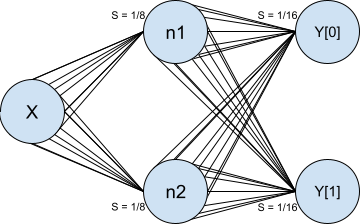

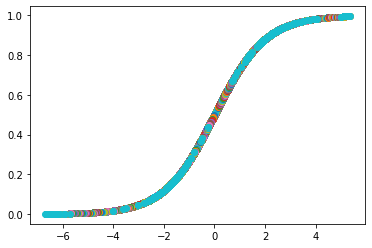

In [19]:
neuralnet1 = nn_model(Xtrain, Ytrain, 2, False, num_iterations = 200)

Accuracy of nn1 on training data: 96%


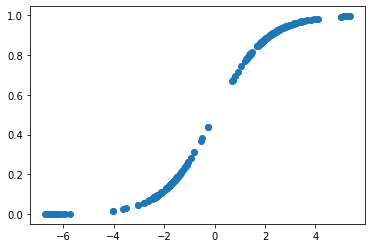

In [20]:
predict1 = predict(neuralnet1, Xtrain, 2)
Yre1 = Ytrain.reshape(1, Ytrain.shape[0] * Ytrain.shape[1])
predict1re = predict1.reshape(1, predict1.shape[0] * predict1.shape[1])
print ('Accuracy of nn1 on training data: %d' % float((np.dot(Yre1, predict1re.T) + np.dot(1 - Yre1, 1 - predict1re.T)) / float(Yre1.size) * 100) + '%')

Accuracy of nn1 on testing data: 96%


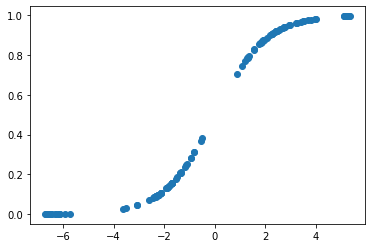

In [21]:
predict2 = predict(neuralnet1, Xtest, 2)
Yre2 = Ytest.reshape(1, Ytest.shape[0] * Ytest.shape[1])
predict2re = predict2.reshape(1, predict2.shape[0] * predict2.shape[1])
print ('Accuracy of nn1 on testing data: %d' % float((np.dot(Yre2, predict2re.T) + np.dot(1 - Yre2, 1 - predict2re.T)) / float(Yre2.size) * 100) + '%')

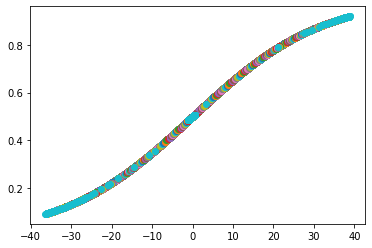

In [22]:
neuralnet2 = nn_model(Xtrain, Ytrain, 2, True, num_iterations = 200)

Accuracy of nn2 on training data: 73%


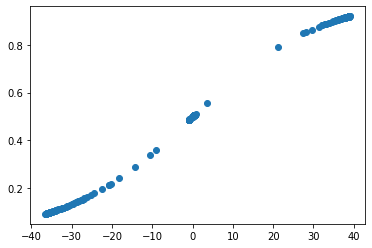

In [23]:
predict3 = predict(neuralnet2, Xtrain, 2, ss = True)
Yre3 = Ytrain.reshape(1, Ytrain.shape[0] * Ytrain.shape[1])
predict3re = predict3.reshape(1, predict3.shape[0] * predict3.shape[1])
print ('Accuracy of nn2 on training data: %d' % float((np.dot(Yre3, predict3re.T) + np.dot(1 - Yre3, 1 - predict3re.T)) / float(Yre3.size) * 100) + '%')

Accuracy of nn2 on testing data: 75%


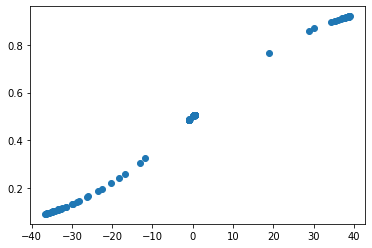

In [24]:
predict4 = predict(neuralnet2, Xtest, 2, ss = True)
Yre4 = Ytest.reshape(1, Ytest.shape[0] * Ytest.shape[1])
predict4re = predict4.reshape(1, predict4.shape[0] * predict4.shape[1])
print ('Accuracy of nn2 on testing data: %d' % float((np.dot(Yre4, predict4re.T) + np.dot(1 - Yre4, 1 - predict4re.T)) / float(Yre4.size) * 100) + '%')